1.Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the `date` column.

A vantagem de converter uma coluna de datas para o tipo datetime no pandas (usando pd.to_datetime()) é que isso permite trabalhar com funcionalidades específicas de datas e otimiza análises temporais.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fcc-forum-pageviews.csv')

df["date"] = pd.to_datetime(df["date"]) # Converte a coluna de DATE para DATETIME

df.set_index('date', inplace=True)

df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


2.Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [32]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
print(df)

             value
date              
2016-05-19   19736
2016-05-26   18060
2016-05-27   19997
2016-05-28   19044
2016-05-29   20325
...            ...
2019-11-24  138875
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-03  158549

[1238 rows x 1 columns]


3.Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_3.png". The title should be `Daily freeCodeCamp Forum Page Views 5/2016-12/2019`. The label on the `x` axis should be `Date` and the label on the `y` axis should be `Page Views`.

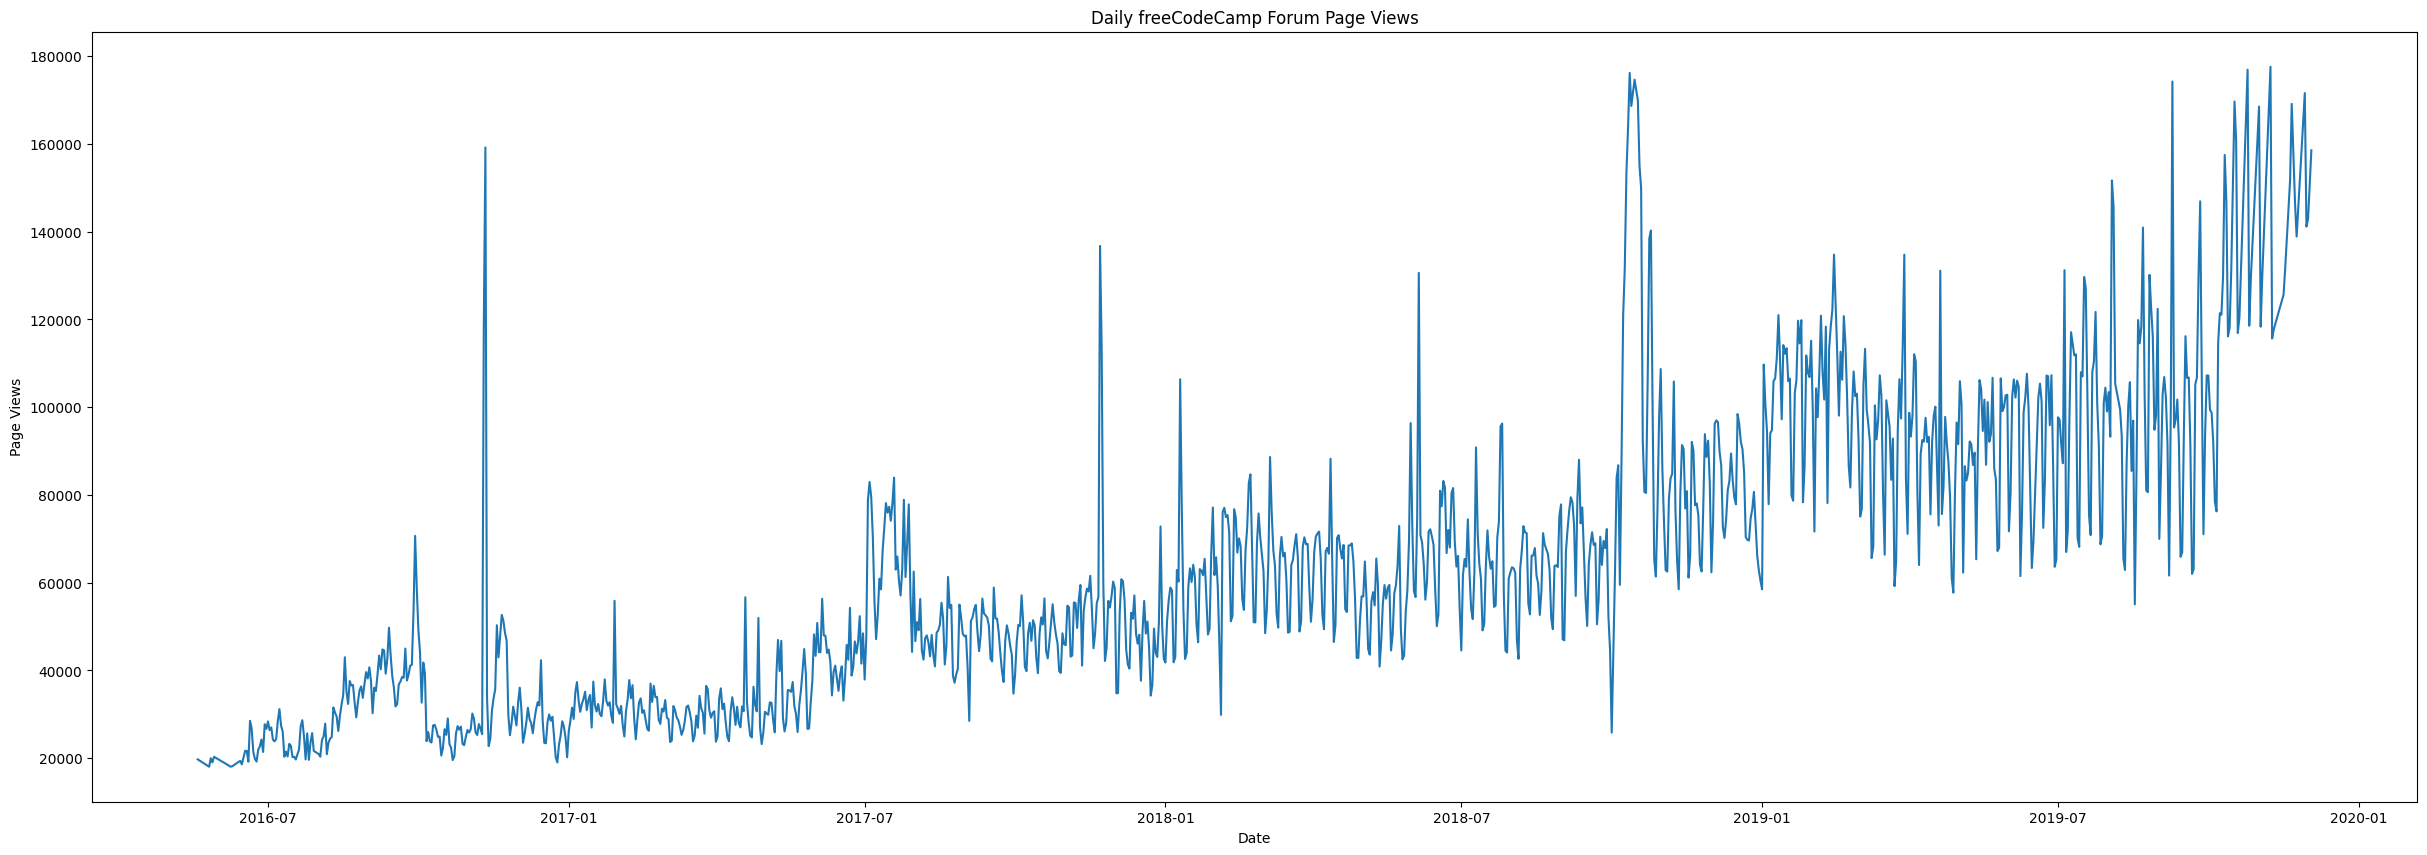

In [33]:
fig, ax = plt.subplots(figsize=(30,10), dpi=100)
ax.set(xlabel='Date', ylabel='Page Views',
       title='Daily freeCodeCamp Forum Page Views')

sns.lineplot(data=df, legend=False)

fig.savefig('img/line_plot.png')
plt.show()


4.Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

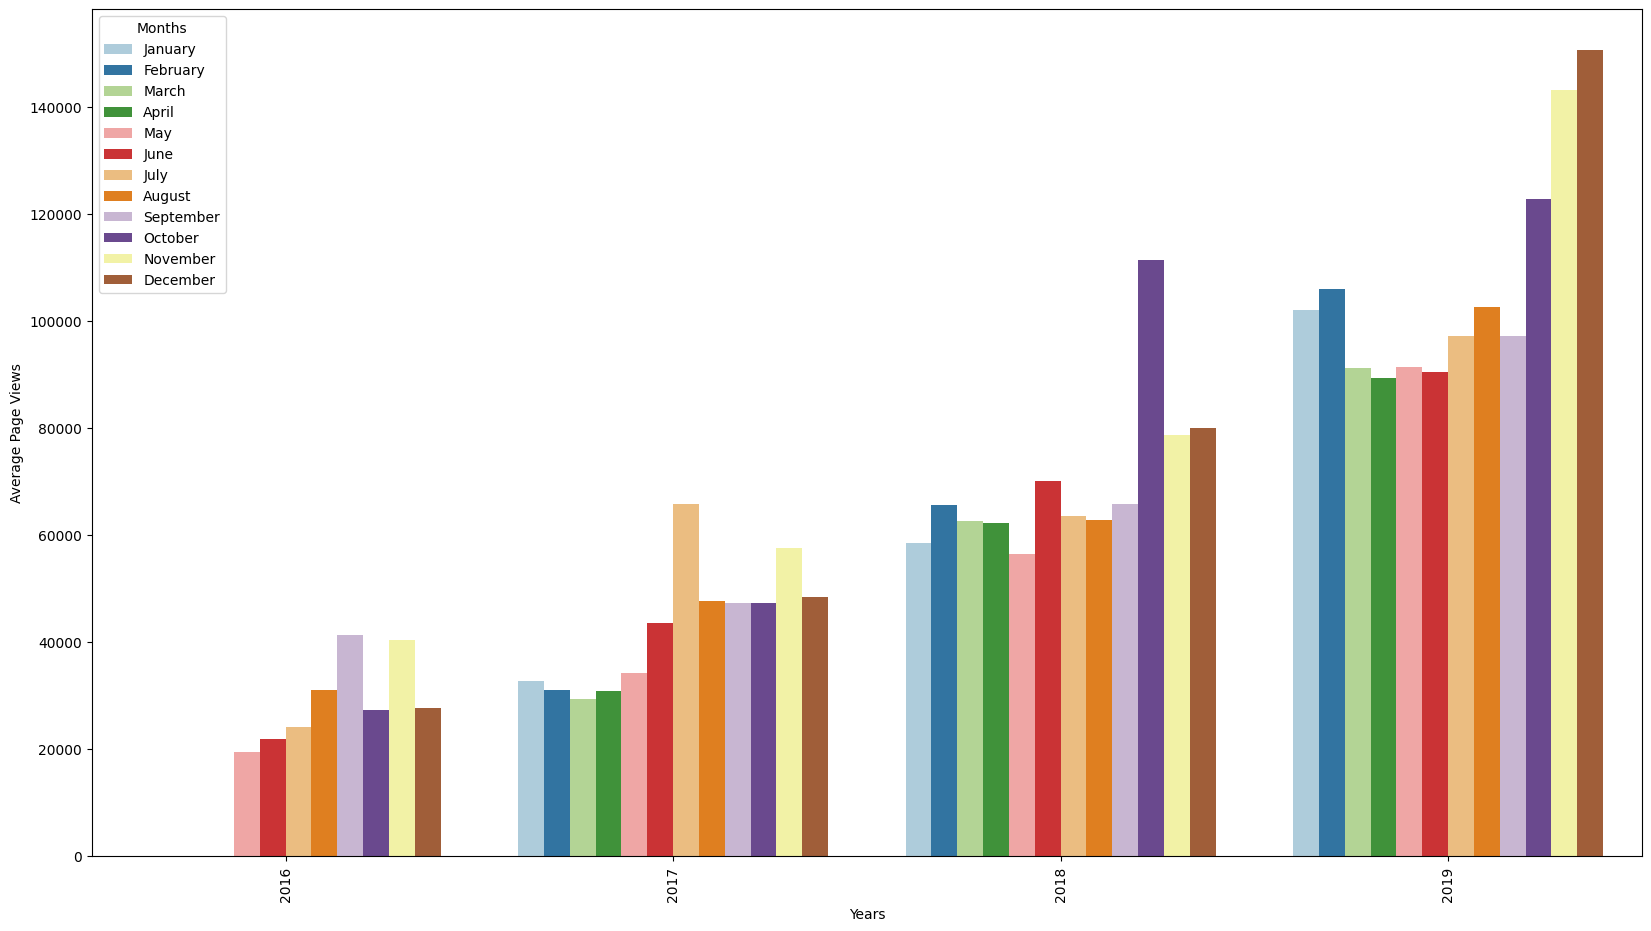

In [34]:
df_bar = df.copy()
df_bar["Years"] = df_bar.index.year
df_bar["Months"] = df_bar.index.month_name()
df_bar = pd.DataFrame(df_bar.groupby(["Years", "Months"], sort=False)["value"].mean().round().astype(int))
df_bar = df_bar.rename(columns={"value": "Average Page Views"})

fig, ax = plt.subplots(figsize=(20,11), dpi=100)
ax.set(
    xlabel = "Years",
    ylabel = "Average Page Views",
    title=""
)

palette = sns.color_palette("Paired", 12)

month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]


chart = sns.barplot(data=df_bar, x="Years", y="Average Page Views", hue="Months", hue_order=month_order, palette=palette)
plt.setp(chart.get_xticklabels(), rotation=90, ha='center')

fig.savefig("img/barplot")


plt.show()

5.Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

C:\Users\Leo\AppData\Local\Temp\ipykernel_13708\667662221.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x="year", y="value", ax=axes[0], palette="tab10", legend=False)
C:\Users\Leo\AppData\Local\Temp\ipykernel_13708\667662221.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=axes[1],palette="tab10", legend=False)


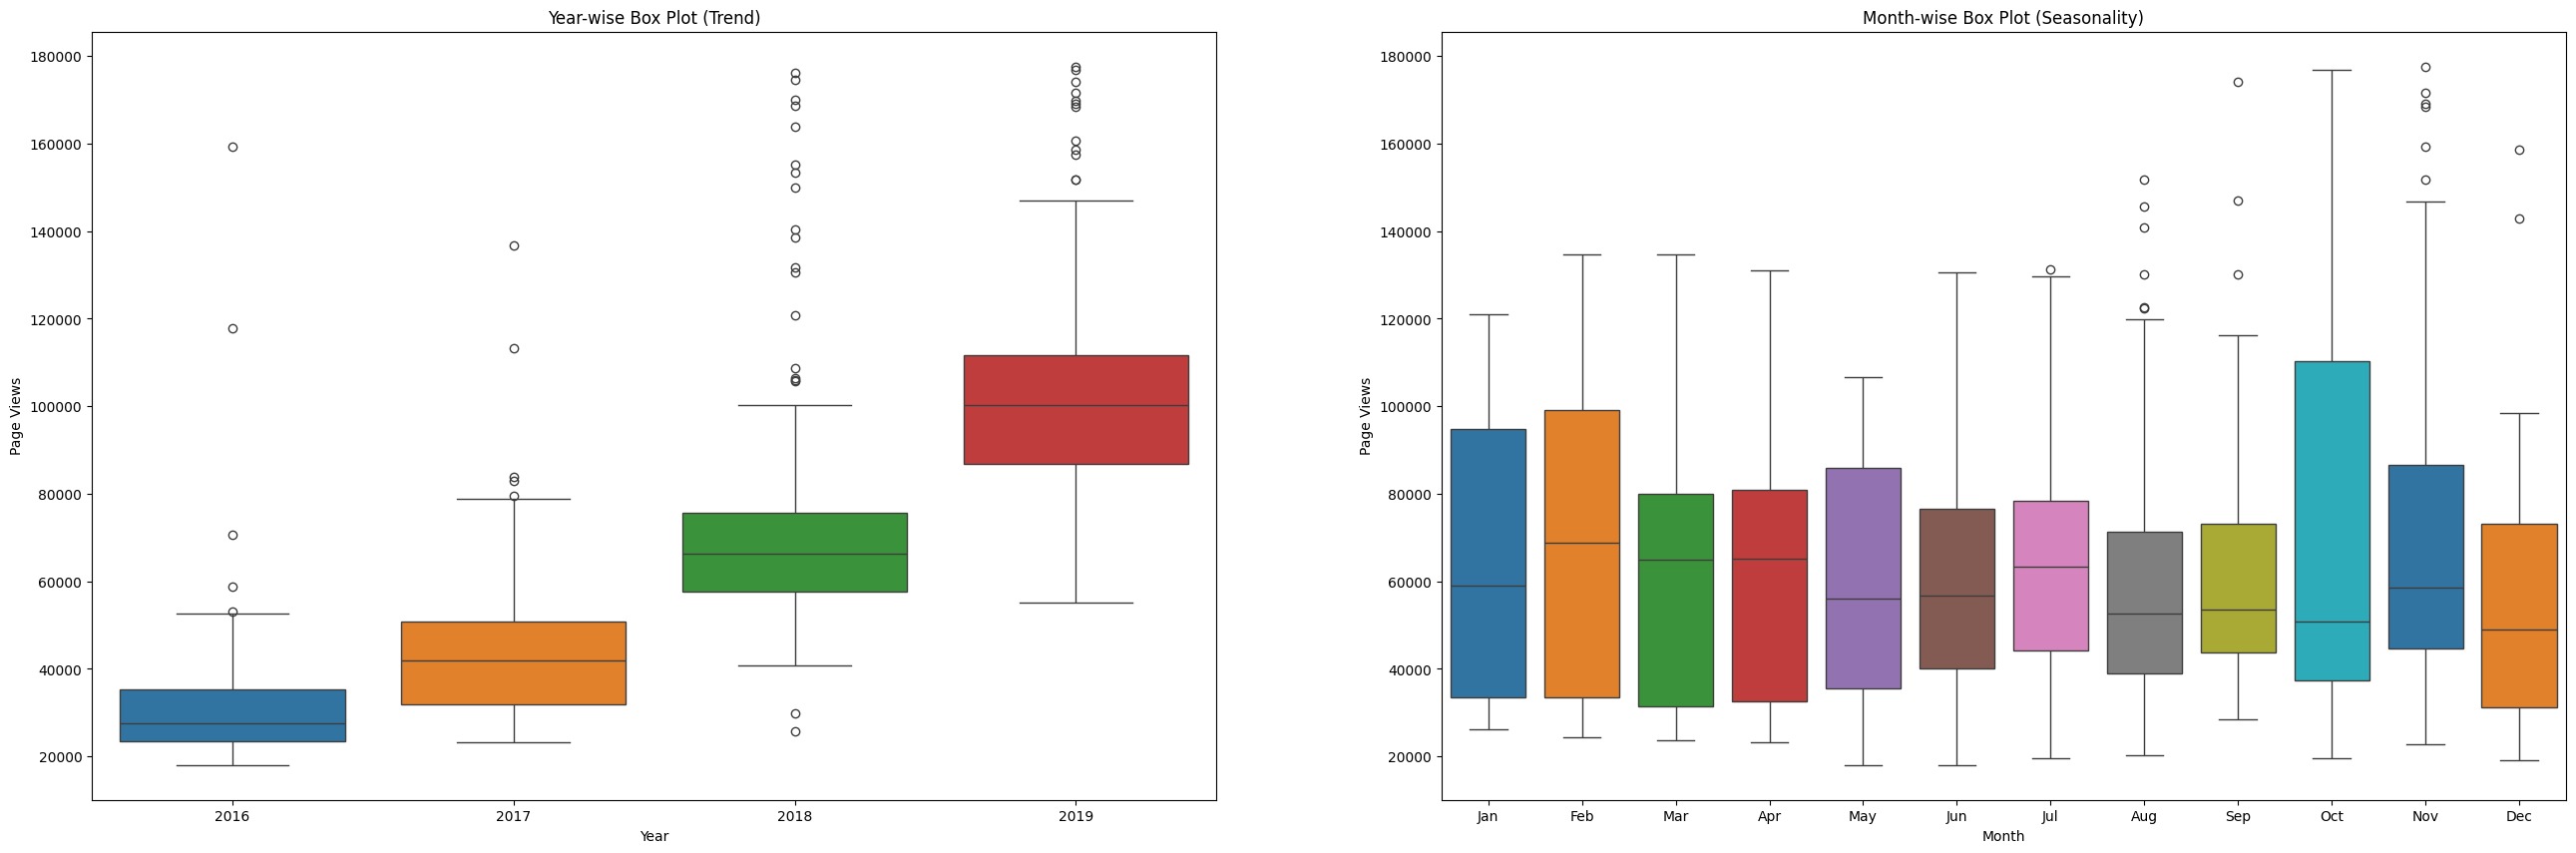

In [42]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime("%b") for d in df_box.date]

# Draw box plots (using Seaborn)
fig, axes = plt.subplots(1, 2, figsize=(32, 10), dpi=100)
    
# Yearly boxplot
sns.boxplot(data=df_box, x="year", y="value", ax=axes[0], palette="tab10", legend=False)
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

# Monthly boxplot
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=axes[1],palette="tab10", legend=False)
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")

fig.savefig("img/box_plot.png")

